In [15]:
# 1.import data and library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# 2.load data

# เปลี่ยน path ตามไฟล์ของคุณ
df = pd.read_csv("/Users/hilmanyusoh/Desktop/House-Price-Prediction/data/USA Housing Dataset.csv")

# ดูตัวอย่างข้อมูล
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [21]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

(4140, 18)

In [17]:
# 3.Data Cleaning

# ลบคอลัมน์ที่ไม่จำเป็น (ที่ไม่ใช่ตัวเลขหรือมีข้อมูลซ้ำซ้อน เช่น ที่อยู่, วันที่)
df_model = df.drop(columns=['date', 'street', 'city', 'statezip', 'country'])

# ตรวจสอบค่าที่ขาดหาย
print(df_model.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64


In [18]:
# 4. Model

# แยก Features และ Target
x = df_model.drop('price', axis=1)  # ตัวแปรต้น
y = df_model['price'] 

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ Train-test 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# 6. สร้างและเทรนโมเดล Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 7. ทำนายผล (Prediction)
y_pred = model.predict(X_test)

# 8. ประเมินผลโมเดล
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 167422.50033432478
Root Mean Squared Error (RMSE): 256023.6356287411
R-squared (R2 Score): 0.37475248028187913


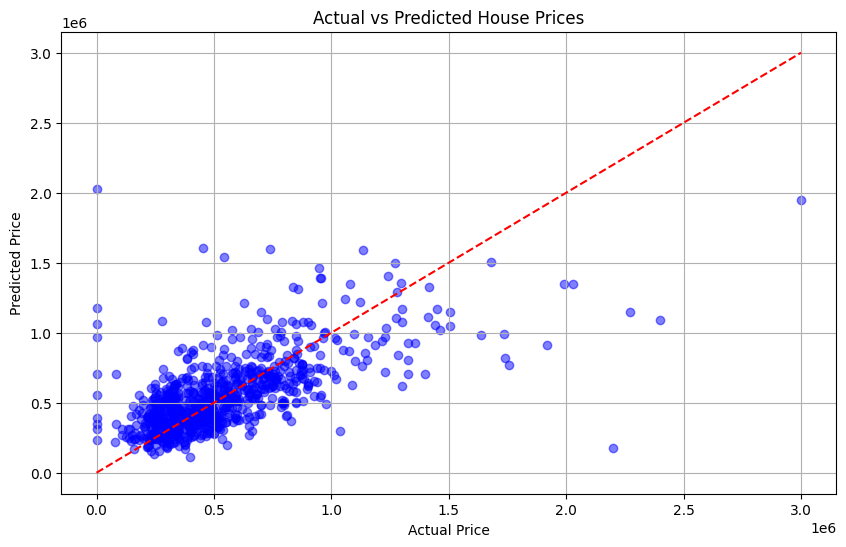

In [ ]:
# 9. Visualize the results
#  กราฟเปรียบเทียบราคาที่แท้จริงกับราคาที่โมเดลทำนาย (Actual vs Predicted)Actual vs Predicted

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


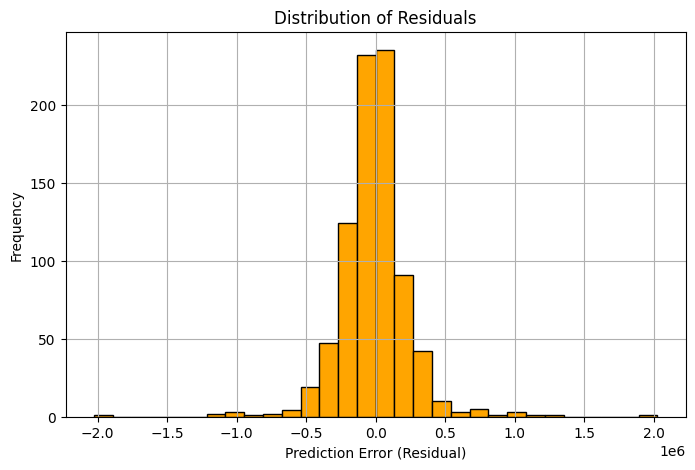

In [ ]:
# Histogram ของ Residuals (ค่าความคลาดเคลื่อน: Actual - Predicted)

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.xlabel('Prediction Error (Residual)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


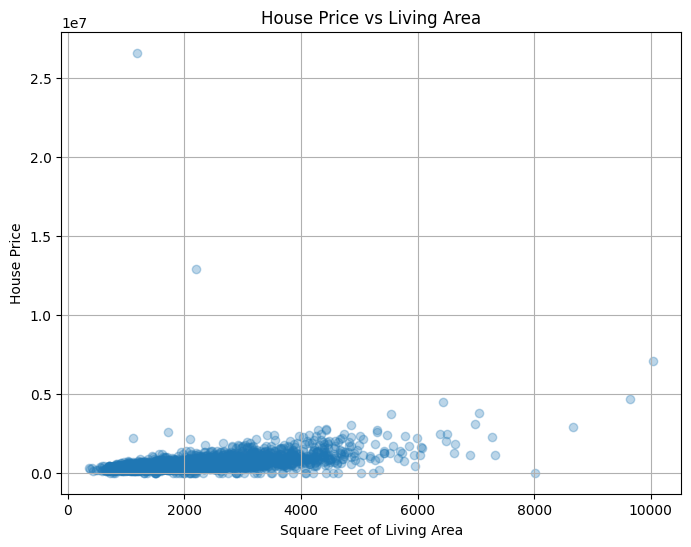

In [ ]:
# Scatter plot ของ Square Feet of Living Area กับ House price
plt.figure(figsize=(8,6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.3)
plt.xlabel('Square Feet of Living Area')
plt.ylabel('House Price')
plt.title('House Price vs Living Area')
plt.grid(True)
plt.show()